# Análisis de la integración económica de la población venezolana en el Perú en los años 2021 y 2022


Integrantes de grupo:
* Carlos Mariños
* Fabrizio Montalvo
* Paolo Salazar
* Cynthia Zhou

### I. PREPROCESAMIENTO DE LOS DATOS

In [ ]:
# Importar las librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
# Cargar archivos
# Características de la vivienda y del hogar
CVH = pd.read_csv("Características de la vivienda y del hogar.csv")
CVH.head()

,CCDD,DEPARTAMENTO,CCPP,PROVINCIA,CCDI,DISTRITO,CIUDAD,CONGLOMERADO,NSELV,VIVIENDA,...,P111A,P112_1,P112_2,P112_3,P112_4,P112_5,P112_6,P112_7,P112_8,factorfinal
0,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,34,242,11,...,,,,,,,,,,36.8443160934628
1,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,38,229,16,...,2,2.No,1.Sí,1.Sí,2.No,2.No,2.No,2.No,2.No,18.4221580467314
2,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,43,605,17,...,,1.Sí,1.Sí,1.Sí,2.No,1.Sí,2.No,1.Sí,2.No,12.2814386978209
3,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,46,543,12,...,,2.No,1.Sí,1.Sí,2.No,2.No,2.No,2.No,2.No,9.21107902336571
4,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,48,529,16,...,,1.Sí,2.No,1.Sí,1.Sí,1.Sí,2.No,1.Sí,2.No,12.2814386978209


In [ ]:
#dimensiones de la bd1
CVH.shape

(3769, 55)

In [ ]:
# Características de los residentes del hogar
CRH = pd.read_csv("Características de los residentes del hogar.csv")
CRH.head()

,CCDD,DEPARTAMENTO,CCPP,PROVINCIA,CCDI,DISTRITO,CIUDAD,CONGLOMERADO,NSELV,VIVIENDA,...,P211_N,P211_1,P200_APORTANTE,P211_N_PARENTESCO,P211_N_SEXO,P211_N_AÑOS,P211_N_MESES,P211_N_ECIVIL,P211_N_MIGRANTE,factorfinal
0,15,LIMA,1,LIMA,19,LURIN,Lima,29806,68378,12,...,2,4.Otro,,2,2,29,,1,1,133.030686
1,15,LIMA,1,LIMA,19,LURIN,Lima,29778,68073,9,...,1,4.Otro,,1,2,35,,1,1,133.030686
2,7,LIMA,1,CALLAO,1,CALLAO,Lima,1814802,16137,9,...,1,4.Otro,,1,2,35,,6,1,133.030686
3,14,LAMBAYEQUE,1,CHICLAYO,6,LA VICTORIA,Chiclayo,3976,4564,9,...,1,4.Otro,,1,2,17,,6,1,18.043333
4,2,ANCASH,18,SANTA,1,CHIMBOTE,Chimbote,12284,10250,9,...,5,4.Otro,,11,2,17,,1,1,26.351641


In [ ]:
#dimensiones de la bd2
CRH.shape

(12487, 42)

In [ ]:
# Empleo
Emp = pd.read_csv("Empleo.csv")
Emp.head()

,CCDD,DEPARTAMENTO,CCPP,PROVINCIA,CCDI,DISTRITO,CIUDAD,CONGLOMERADO,NSELV,VIVIENDA,...,P638_4_2,P639_1,P639_1_1,P639_1_2,P639_1_3,P639_2,P639_2_1,P639_2_2,P639_2_3,factorfinal
0,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,34,240,21,...,,1.Sí,1.Transferencias bancarias y/o agencia de envío,3.Quincenal,1.¿0 – 100 soles?,2.No,,,,9.211079
1,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,34,240,21,...,,1.Sí,1.Transferencias bancarias y/o agencia de envío,4.Mensual,1.¿0 – 100 soles?,2.No,,,,9.211079
2,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,34,240,21,...,,2.No,,,,2.No,,,,9.211079
3,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,34,240,21,...,,,,,,,,,,9.211079
4,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,36,200,25,...,,1.Sí,1.Transferencias bancarias y/o agencia de envío,2.Semanal,2.¿101 – 200 soles?,1.Sí,1.Transferencias bancarias y/o agencia de envío,5.Bimestral,3.¿201 – a más soles?,18.422158


In [ ]:
#dimensiones de la bd3
Emp.shape

(10242, 128)

In [ ]:
# Salud
SLD=pd.read_csv("Salud.csv")
SLD.head()

<ipython-input-8-46f8a64a749a>:2: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  SLD=pd.read_csv("Salud.csv")


,CCDD,DEPARTAMENTO,CCPP,PROVINCIA,CCDI,DISTRITO,CIUDAD,CONGLOMERADO,NSELV,VIVIENDA,...,P417_1_11,P417_1_12,P417_1_13,P417_2,P417_3,P417_4,P418,P418A,P200_N_CUIDADOR,factorfinal
0,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,34,240,21,...,0,0,0,2.No,2.No,2.No,,,,9.211079
1,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,34,240,21,...,0,0,0,1.Sí,2.No,2.No,2.No,,,9.211079
2,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,34,240,21,...,,,,2.No,1.Sí,2.No,,,,9.211079
3,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,34,240,21,...,,,,,,,,,,9.211079
4,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,36,200,25,...,,,,1.Sí,2.No,2.No,2.No,,,18.422158


In [ ]:
#dimensiones de la bd4
SLD.shape

(11621, 116)

In [ ]:
# Reemplazar los espacios en nulo en la columna "P622_1" del dataframe Empleo, esta columna corresponde a Ingreso total en dinero
Emp["P622_1"] = Emp['P622_1'].replace(" ", pd.NA)
Emp['P622_1']=pd.to_numeric(Emp['P622_1'])
Emp['P622_1'].describe()

,P622_1
count,4203.000000
mean,511.032358
std,620.282042
min,0.000000
25%,200.000000
50%,330.000000
75%,600.000000
max,9500.000000


In [ ]:
# Ver las columnas en común en los dataframes Empleo y Salud
columnas = set(Emp.columns).intersection(SLD.columns)
columnas

{'CCDD',
 'CCDI',
 'CCPP',
 'CIUDAD',
 'CONGLOMERADO',
 'DEPARTAMENTO',
 'DISTRITO',
 'ESTRATO',
 'NHOGAR',
 'NSELV',
 'P15',
 'P15_N',
 'P200_N',
 'PROVINCIA',
 'RESFIN',
 'THOGAR',
 'VIVIENDA',
 'VRESFIN',
 'factorfinal'}

In [ ]:
columnas=['CCDD',
 'CCDI',
 'CCPP',
 'CIUDAD',
 'CONGLOMERADO',
 'DEPARTAMENTO',
 'DISTRITO',
 'ESTRATO',
 'NHOGAR',
 'NSELV',
 'P15',
 'P15_N',
 'P200_N',
 'PROVINCIA',
 'RESFIN',
 'THOGAR',
 'VIVIENDA',
 'VRESFIN',
 'factorfinal']

# Realizar el merge con las columnas en común obtenidas
df2 = pd.merge(SLD, Emp, on=columnas)
df2.shape

(10242, 225)

In [ ]:
# Repetir el proceso, ahora con el dataframe Características de los residentes del hogar
columnas2 = set(df2.columns).intersection(CRH.columns)
columnas2

{'CCDD',
 'CCDI',
 'CCPP',
 'CIUDAD',
 'CONGLOMERADO',
 'DEPARTAMENTO',
 'DISTRITO',
 'ESTRATO',
 'NHOGAR',
 'NSELV',
 'P15',
 'P15_N',
 'P200_N',
 'PROVINCIA',
 'RESFIN',
 'THOGAR',
 'VIVIENDA',
 'VRESFIN',
 'factorfinal'}

In [ ]:
columnas2=['CCDD',
 'CCDI',
 'CCPP',
 'CIUDAD',
 'CONGLOMERADO',
 'DEPARTAMENTO',
 'DISTRITO',
 'ESTRATO',
 'NHOGAR',
 'NSELV',
 'P15',
 'P15_N',
 'P200_N',
 'PROVINCIA',
 'RESFIN',
 'THOGAR',
 'VIVIENDA',
 'VRESFIN',
 'factorfinal']

# Realizar el merge
df_final = pd.merge(df2, CRH, on=columnas2)
df_final.shape

(10242, 248)

In [ ]:
# Reducir las filas a sólo las que no tienen vacío el la columna P622_1
df_final = df_final.dropna(subset=['P622_1'])
df_final.shape

(4203, 248)

In [ ]:
#estadisticas descriptivas de la columna a evaluar
df_final['P622_1'].describe()

,P622_1
count,4203.000000
mean,511.032358
std,620.282042
min,0.000000
25%,200.000000
50%,330.000000
75%,600.000000
max,9500.000000


In [ ]:
# Reemplazar todos los vacíos en nulo
df_final = df_final.replace(" ", pd.NA)
# Eliminar las columnas con más del 70% de los datos vacíos
df_final.dropna(axis=1,inplace=True,thresh=int(df_final.shape[0]*0.7))
df_final.shape

(4203, 96)

In [ ]:
df_final.sample(5)

,CCDD,DEPARTAMENTO,CCPP,PROVINCIA,CCDI,DISTRITO,CIUDAD,CONGLOMERADO,NSELV,VIVIENDA,...,P638_4,P639_1,P639_2,INF_200,P203,P204,P205_A,P206,P207_1,P208
1744,13,LA LIBERTAD,1,TRUJILLO,5,LA ESPERANZA,Trujillo,10347,5194,4,...,2.No,1.Sí,2.No,1,1.Jefe/a del hogar,2.Mujer,53,1.Conviviente,1.El Nº es,1.Sí
9341,15,LIMA,1,LIMA,17,LOS OLIVOS,Lima,2044402,27126,17,...,2.No,1.Sí,2.No,1,1.Jefe/a del hogar,2.Mujer,41,1.Conviviente,1.El Nº es,1.Sí
6356,15,LIMA,1,LIMA,40,SANTIAGO DE SURCO,Lima,27293,46391,23,...,2.No,1.Sí,2.No,1,11.Otro no pariente,1.Hombre,26,6.Soltero/a,1.El Nº es,1.Sí
5521,15,LIMA,1,LIMA,37,SANTA ANITA,Lima,24360,55101,17,...,2.No,2.No,2.No,2,3.Hijo/a o hijastro/a,1.Hombre,39,6.Soltero/a,3.No tiene,1.Sí
9240,15,LIMA,1,LIMA,35,SAN MARTIN DE PORRES,Lima,1954601,29918,27,...,2.No,1.Sí,2.No,1,1.Jefe/a del hogar,2.Mujer,44,6.Soltero/a,1.El Nº es,1.Sí


In [ ]:
# Contar nulos
df_final.isna().sum()

,0
CCDD,0
DEPARTAMENTO,0
CCPP,0
PROVINCIA,0
CCDI,0
...,...
P204,0
P205_A,0
P206,0
P207_1,4


In [ ]:
# Eliminar duplicados
df_final.drop_duplicates(inplace=True)
df_final.shape

(4203, 96)

In [ ]:
#Tipos de variables
df_final.dtypes

,0
CCDD,int64
DEPARTAMENTO,object
CCPP,int64
PROVINCIA,object
CCDI,int64
...,...
P204,object
P205_A,object
P206,object
P207_1,object


In [ ]:
#Revisamos la información general del db
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4203 entries, 0 to 10240
Data columns (total 96 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CCDD          4203 non-null   int64  
 1   DEPARTAMENTO  4203 non-null   object 
 2   CCPP          4203 non-null   int64  
 3   PROVINCIA     4203 non-null   object 
 4   CCDI          4203 non-null   int64  
 5   DISTRITO      4203 non-null   object 
 6   CIUDAD        4203 non-null   object 
 7   CONGLOMERADO  4203 non-null   int64  
 8   NSELV         4203 non-null   int64  
 9   VIVIENDA      4203 non-null   int64  
 10  THOGAR        4203 non-null   int64  
 11  NHOGAR        4203 non-null   int64  
 12  ESTRATO       4203 non-null   object 
 13  VRESFIN       4203 non-null   object 
 14  RESFIN        4203 non-null   object 
 15  P15           4203 non-null   object 
 16  P15_N         4203 non-null   int64  
 17  P200_N        4203 non-null   int64  
 18  INF_400       4203 non-null   in

In [ ]:
# Guardar una copia del dataframe final
df_original = df_final.copy()

# Función para convertir columnas a numéricas si es que la conversión genera más del 50% datos no nulos
def convertir_columna_a_numerica(columna):
    # Intentar convertir la columna a numérica
    convertir = pd.to_numeric(columna, errors='coerce')
    # Si la conversión deja más de la mitad de los valores como NaN, revertimos a la columna original
    if convertir.isna().sum() > len(columna) / 2:
        return columna  # Devolver la columna original si es mayoritariamente no numérica
    return convertir.fillna(columna)  # Devolver los valores originales en los NaNs

# Aplicar la conversión sólo a las columnas que pueden ser numéricas
df_convertida = df_original.apply(convertir_columna_a_numerica)
df_convertida.head()

,CCDD,DEPARTAMENTO,CCPP,PROVINCIA,CCDI,DISTRITO,CIUDAD,CONGLOMERADO,NSELV,VIVIENDA,...,P638_4,P639_1,P639_2,INF_200,P203,P204,P205_A,P206,P207_1,P208
0,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,34,240,21,...,2.No,1.Sí,2.No,2,1.Jefe/a del hogar,1.Hombre,38,2.Casado/a,1.El Nº es,1.Sí
1,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,34,240,21,...,2.No,1.Sí,2.No,2,2.Esposo/a o compañero/a,2.Mujer,37,2.Casado/a,1.El Nº es,1.Sí
24,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,38,236,7,...,2.No,1.Sí,2.No,1,1.Jefe/a del hogar,2.Mujer,26,1.Conviviente,1.El Nº es,1.Sí
25,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,38,237,8,...,2.No,1.Sí,2.No,2,1.Jefe/a del hogar,1.Hombre,26,1.Conviviente,1.El Nº es,1.Sí
27,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,38,238,9,...,2.No,1.Sí,2.No,1,1.Jefe/a del hogar,2.Mujer,42,5.Separado o Ex conviviente,1.El Nº es,1.Sí


In [ ]:
# Encoding para las variables categóricas
df_cat = df_convertida.select_dtypes('object')
df_cat.head()

,DEPARTAMENTO,PROVINCIA,DISTRITO,CIUDAD,ESTRATO,VRESFIN,RESFIN,P15,P401_1,P401_2,...,P638_2,P638_3,P638_4,P639_1,P639_2,P203,P204,P206,P207_1,P208
0,TUMBES,TUMBES,TUMBES,Tumbes,2.Medio bajo,1.Completa,1.Completa,1.Sí,1.ESSALUD?,0.0,...,2.No,2.No,2.No,1.Sí,2.No,1.Jefe/a del hogar,1.Hombre,2.Casado/a,1.El Nº es,1.Sí
1,TUMBES,TUMBES,TUMBES,Tumbes,2.Medio bajo,1.Completa,1.Completa,1.Sí,1.ESSALUD?,0.0,...,2.No,2.No,2.No,1.Sí,2.No,2.Esposo/a o compañero/a,2.Mujer,2.Casado/a,1.El Nº es,1.Sí
24,TUMBES,TUMBES,TUMBES,Tumbes,2.Medio bajo,1.Completa,1.Completa,1.Sí,0.0,0.0,...,2.No,2.No,2.No,1.Sí,2.No,1.Jefe/a del hogar,2.Mujer,1.Conviviente,1.El Nº es,1.Sí
25,TUMBES,TUMBES,TUMBES,Tumbes,2.Medio bajo,1.Completa,1.Completa,1.Sí,0.0,0.0,...,2.No,2.No,2.No,1.Sí,2.No,1.Jefe/a del hogar,1.Hombre,1.Conviviente,1.El Nº es,1.Sí
27,TUMBES,TUMBES,TUMBES,Tumbes,2.Medio bajo,1.Completa,1.Completa,1.Sí,0.0,0.0,...,2.No,2.No,2.No,1.Sí,2.No,1.Jefe/a del hogar,2.Mujer,5.Separado o Ex conviviente,1.El Nº es,1.Sí


In [ ]:
#factorización de las variables categóricas
for i in df_cat.columns:
    le = LabelEncoder()
    #Pasar las variables a string
    df_cat[i] = df_cat[i].astype(str)
    df_cat[i] = le.fit_transform(df_cat[i])
    df_convertida[i] = df_cat[i]
df_convertida.head()

,CCDD,DEPARTAMENTO,CCPP,PROVINCIA,CCDI,DISTRITO,CIUDAD,CONGLOMERADO,NSELV,VIVIENDA,...,P638_4,P639_1,P639_2,INF_200,P203,P204,P205_A,P206,P207_1,P208
0,24,7,1,8,1,57,7,34,240,21,...,1,0,1,2,0,0,38,1,0,0
1,24,7,1,8,1,57,7,34,240,21,...,1,0,1,2,3,1,37,1,0,0
24,24,7,1,8,1,57,7,38,236,7,...,1,0,1,1,0,1,26,0,0,0
25,24,7,1,8,1,57,7,38,237,8,...,1,0,1,2,0,0,26,0,0,0
27,24,7,1,8,1,57,7,38,238,9,...,1,0,1,1,0,1,42,4,0,0


In [ ]:
# Crear la nueva columna basada en la lógica indicada
def classify_row(row):
    if row['P401_5'] == 1:
        return 0
    elif row['P401_1'] == 1:
        return 1
    elif row['P401_2'] == 1:
        return 2
    elif row['P401_3'] == 1:
        return 3
    elif row['P401_4'] == 1:
        return 4
    else:
        return None  # Caso donde no haya una clasificación clara

df_convertida['P401_C'] = df_convertida.apply(classify_row, axis=1)

# Mostrar los primeros resultados de la nueva columna
df_convertida[['P401_1', 'P401_2', 'P401_3', 'P401_4', 'P401_5', 'P401_C']].head()
df_convertida.drop(columns=['P401_1', 'P401_2', 'P401_3', 'P401_4', 'P401_5'], inplace=True)

In [ ]:
# Cambiar la variable objetivo a 'P622_1'
target_column = 'P622_1'

# Separar las características (X) y la variable objetivo (y)
X = df_convertida.drop(columns=[target_column])
y = df_convertida[target_column]

# Codificar variables categóricas, si es necesario
X = X.apply(LabelEncoder().fit_transform)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo de RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Obtener las importancias de las características
feature_importances = model.feature_importances_

# Crear un DataFrame para visualizar la importancia de cada característica
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Mostrar las 10 características más importantes
print(importances_df)

         Feature  Importance
69          P621    0.045162
8          NSELV    0.039213
7   CONGLOMERADO    0.038154
9       VIVIENDA    0.036434
86        P205_A    0.036394
..           ...         ...
32        P408_6    0.000069
31        P408_5    0.000058
14        RESFIN    0.000041
89          P208    0.000000
15           P15    0.000000

[91 rows x 2 columns]


In [ ]:
df_convertida.columns

Index(['CCDD', 'DEPARTAMENTO', 'CCPP', 'PROVINCIA', 'CCDI', 'DISTRITO',
       'CIUDAD', 'CONGLOMERADO', 'NSELV', 'VIVIENDA', 'THOGAR', 'NHOGAR',
       'ESTRATO', 'VRESFIN', 'RESFIN', 'P15', 'P15_N', 'P200_N', 'INF_400',
       'P402', 'P405_1', 'P405_2', 'P405_3', 'P405_4', 'P405_5', 'P405_6',
       'P405_7', 'P408_1', 'P408_2', 'P408_3', 'P408_4', 'P408_5', 'P408_6',
       'P410_A', 'P410_B', 'P410', 'P417_1', 'P417_2', 'P417_3', 'P417_4',
       'factorfinal', 'INF_600', 'P601', 'P602', 'P609_COD', 'P611_COD',
       'P612', 'P613', 'P614', 'P614_T', 'P615_1', 'P615_2', 'P615_3',
       'P615_4', 'P615_5', 'P615_6', 'P615_7', 'P615_8', 'P615_9', 'P615_10',
       'P615_11', 'P615_12', 'P615_13', 'P615_14', 'P615_T', 'P616', 'P617',
       'P619', 'P620', 'P621', 'P622_1', 'P622_2', 'P624_3', 'P624_4', 'P625',
       'P635', 'P636', 'P637_COD', 'P638_1', 'P638_2', 'P638_3', 'P638_4',
       'P639_1', 'P639_2', 'INF_200', 'P203', 'P204', 'P205_A', 'P206',
       'P207_1', 'P208', '

In [ ]:
# Mapeo de los nombres actuales de las columnas con nombres más descriptivos según el diccionario de datos
mapear_columnas = {
    'CCDD': 'Código departamento',
    'DEPARTAMENTO': 'Nombre departamento',
    'CCPP': 'Código provincia',
    'PROVINCIA': 'Nombre provincia',
    'CCDI': 'Código distrito',
    'DISTRITO': 'Nombre distrito',
    'CIUDAD': 'Ciudad de estudio',
    'CONGLOMERADO': 'Conglomerado',
    'NSELV': 'Número de selección vivienda',
    'VIVIENDA': 'Número vivienda',
    'THOGAR': 'Tipo de hogar',
    'NHOGAR': 'Número de orden del hogar',
    'ESTRATO': 'Estrato socioeconómico',
    'VRESFIN': 'Resultado encuesta vivienda',
    'RESFIN': 'Resultado encuesta hogar',
    'P15': 'Persona llegada de Venezuela',
    'P15_N': 'Número de personas llegadas de Venezuela',
    'P200_N': 'Número de orden de residente',
    'INF_400': 'Información adicional seguro',
    'P401_C': 'Seguro',
    'P402': 'Enfermedad o malestar crónico',
    'P405_1': 'Síntoma reciente (tos, fiebre, etc.)',
    'P405_2': 'Enfermedad reciente (gripe, colitis, etc.)',
    'P405_3': 'Recaída enfermedad crónica',
    'P405_4': 'Accidente reciente',
    'P405_5': 'Problema mental o emocional reciente',
    'P405_6': 'Embarazo reciente',
    'P405_7': 'No tuvo síntomas recientes',
    'P408_1': 'Limitación permanente para moverse',
    'P408_2': 'Limitación permanente para ver',
    'P408_3': 'Limitación permanente para comunicarse',
    'P408_4': 'Limitación permanente para oír',
    'P408_5': 'Limitación permanente para aprender',
    'P408_6': 'Limitación permanente para relacionarse',
    'P410_A': 'Vacunado contra COVID-19',
    'P410_B': 'Número de dosis COVID-19',
    'P410': 'Tuvo COVID-19',
    'P417_1': 'Acceso a métodos anticonceptivos',
    'P417_2': 'Acceso a prueba de VIH',
    'P417_3': 'Acceso a consejería de salud sexual',
    'P417_4': 'Acceso a otros servicios de salud reproductiva',
    'factorfinal': 'Factor de expansión',
    'INF_600': 'Información adicional de acceso',
    'P601': 'Tuvo trabajo la semana pasada',
    'P602': 'Pago o ganancia en dinero/especie',
    'P609_COD': 'Código de ocupacion',
    'P611_COD': 'Código de giro de la empresa',
    'P612': 'Posicion en la jerarquia de la empresa',
    'P613': 'Tiene contrato laboral',
    'P614': 'Rango de personas que trabajan con usted',
    'P614_T': 'N_companheros de trabajo',
    'P615_1': 'Ocupación principal domingo',
    'P615_2': 'Ocupación principal lunes',
    'P615_3': 'Ocupación principal martes',
    'P615_4': 'Ocupación principal miércoles',
    'P615_5': 'Ocupación principal jueves',
    'P615_6': 'Ocupación principal viernes',
    'P615_7': 'Ocupación principal sábado',
    'P615_8': 'Ocupación secundaria domingo',
    'P615_9': 'Ocupación secundaria lunes',
    'P615_10': 'Ocupación secundaria martes',
    'P615_11': 'Ocupación secundaria miércoles',
    'P615_12': 'Ocupación secundaria jueves',
    'P615_13': 'Ocupación secundaria viernes',
    'P615_14': 'Ocupación secundaria sábado',
    'P615_T': 'Total horas trabajadas semana',
    'P616': 'Trabaja normalmente esas horas',
    'P617': 'Quería trabajar mas',
    'P619': 'Busco trabajo la semana pasada',
    'P620': 'Trabajos adicionales en última semana',
    'P621': 'Frecuencia de pago',
    'P622_1': 'Ingreso en dinero',
    'P622_2': 'Ingreso en especie',
    'P624_3': 'Sin remuneracion',
    'P624_4': 'Sin otra actividad',
    'P625': 'Lugar de trabajo cerca',
    'P635': 'No le pagaron',
    'P636': 'Tenia trabajo en venezela',
    'P638_1': 'Pension',
    'P638_2': 'Frecuencia Pension',
    'P638_3': 'Ingresos financieros',
    'P638_4': 'Otros ingresos',
    'P639_1': 'Envio de dinero a venezuela',
    'P639_2': 'Envio de dinero a otros paises',
    'INF_200': 'Información adicional gastos',
    'P203': 'Parentesco con jefe de hogar',
    'P204': 'Sexo',
    'P205_A': 'Edad',
    'P206': 'Estado civil',
    'P207_1': 'Número de celular',
    'P208': 'Migración desde Venezuela'
}



# Renombrar las columnas del DataFrame
df_convertida = df_convertida.rename(columns=mapear_columnas)
df_convertida.head()

len(mapear_columnas)

91

### Análisis de los datos

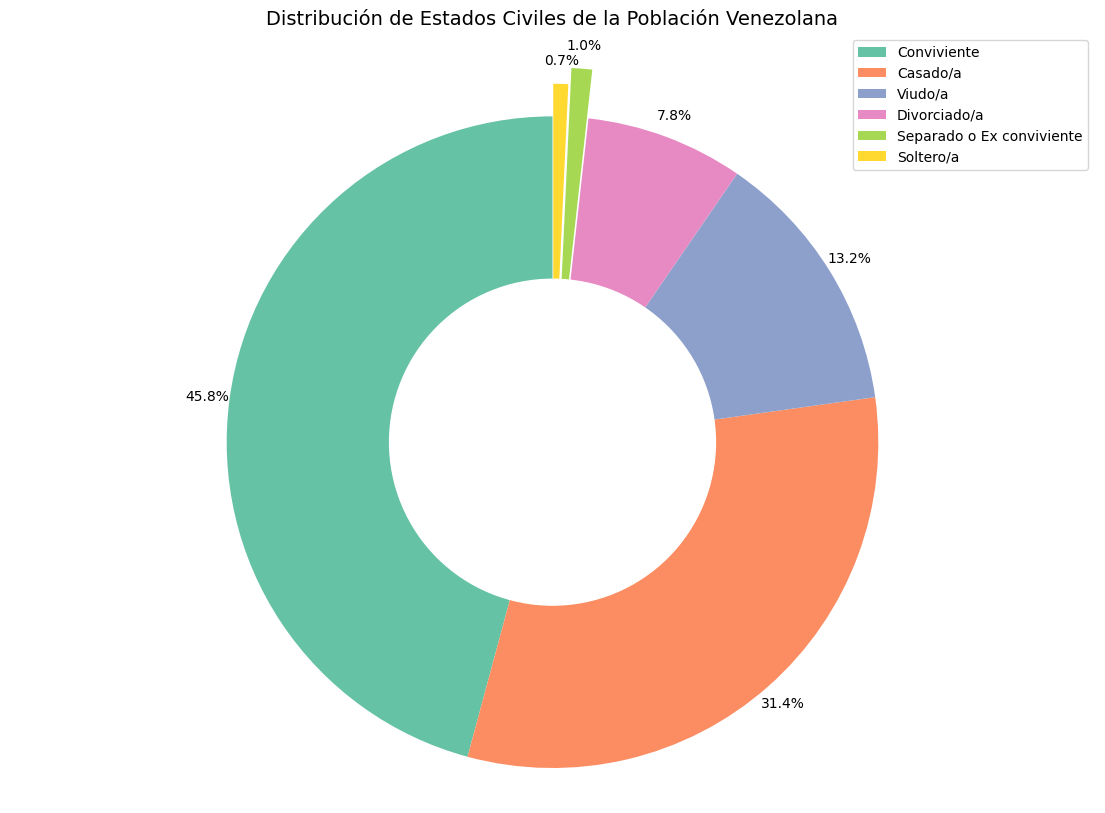

In [ ]:
# Ajustamos el gráfico de pastel siguiendo las reglas de diseño "Evergreen"
# Se utilizarán colores suaves y neutros, evitando la sobrecarga visual

sizes = df_convertida['Estado civil'].value_counts()
plt.figure(figsize=(14, 10))

# Crear gráfico de pastel con una paleta de colores más sobria
plt.pie(
    sizes,
    textprops={'fontsize': 10},
    labels=['Conviviente', 'Casado/a', 'Viudo/a', 'Divorciado/a', 'Separado o Ex conviviente', 'Soltero/a'],
    pctdistance=1.07,
    labeldistance=None,
    autopct='%1.1f%%',
    startangle=90,
    explode=[0, 0, 0, 0, 0.15, 0.1],
    colors=['#66C2A5', '#FC8D62', '#8DA0CB', '#E78AC3', '#A6D854', '#FFD92F'],

)

# Añadir un círculo blanco en el centro para crear el efecto "donut"
centre_circle = plt.Circle((0, 0), 0.5, color='white', fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Ajustamos las proporciones del gráfico
plt.axis('equal')

# Añadimos una leyenda clara y un título discreto
plt.legend()
plt.title('Distribución de Estados Civiles de la Población Venezolana', fontsize=14)
plt.show()


Se observaron las siguientes características:
* Conviviente: La porción más grande, con un 45.8%, representa a las personas que viven en una unión consensual pero no están legalmente casadas.
* Casado/a: El 31.4% de la población está legalmente casada.
* Soltero/a: El 7.8% de la población se clasifica como soltera, es decir, no están casados ni en una unión.
*  Viudo/a: El 13.2% de las personas son viudas.
* Divorciado/a: El 7.8% de la población está divorciada.
* Separado o Ex conviviente: Este grupo, que representa a las personas separadas de su pareja, constituye el 1.0%.
* Otra categoría pequeña: La porción más pequeña, que representa el 0.7%, corresponde a un grupo no especificado.

El gráfico muestra que una parte significativa de la población está en uniones informales o casadas, seguidas por personas viudas y solteras. Esto ofrece una visión general de las tendencias de estado civil y relaciones de los venezolanos en el Perú.


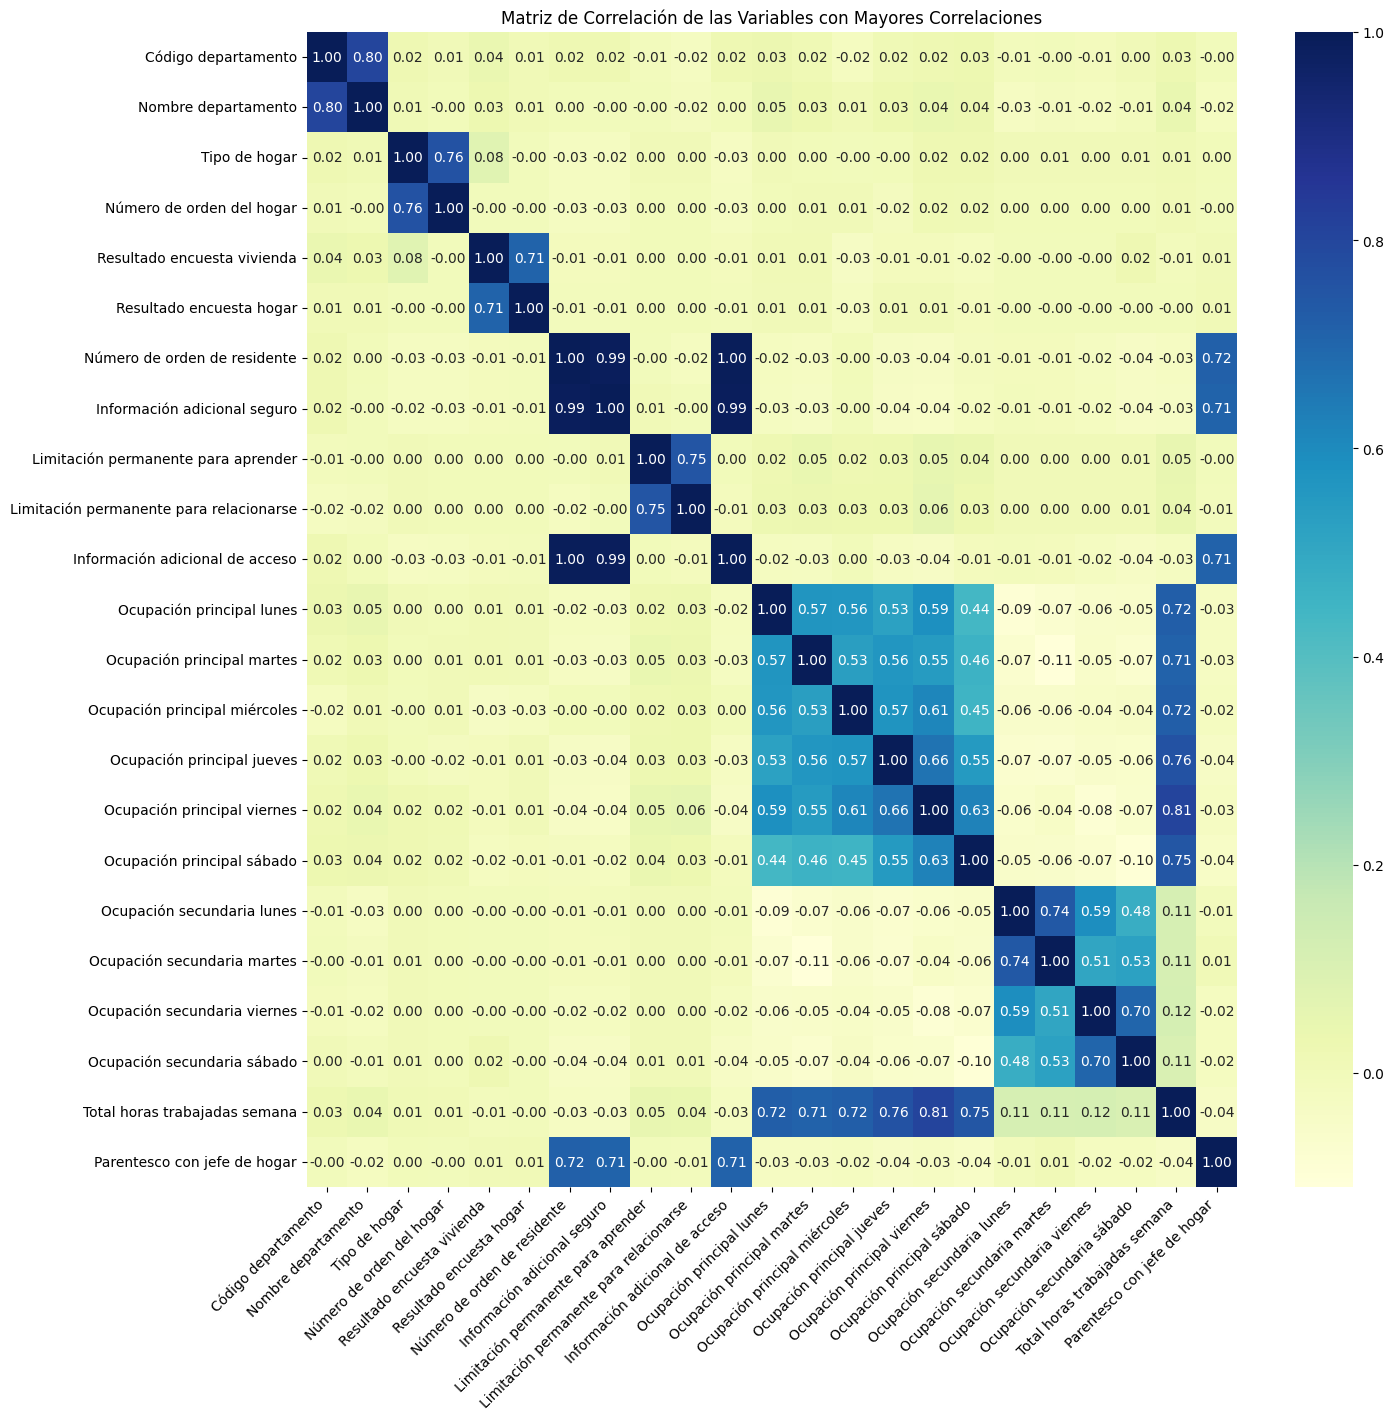

In [ ]:
# Primero, vamos a calcular la matriz de correlación completa para todas las variables numéricas
full_correlation_matrix = df_convertida.corr()

# Filtramos las correlaciones más altas (en valor absoluto) que no sean 1, ya que 1 es la autocorrelación
high_correlation_threshold = 0.7
high_correlations = full_correlation_matrix[(full_correlation_matrix.abs() > high_correlation_threshold) & (full_correlation_matrix.abs() != 1)]

# Filtramos las columnas y filas que tienen al menos una correlación alta
high_correlation_columns = high_correlations.dropna(how='all', axis=1).columns

# Creamos una matriz de correlación con solo estas columnas
filtered_correlation_matrix = df_convertida[high_correlation_columns].corr()

# Graficamos la nueva matriz de correlación
plt.figure(figsize=(15, 15))
sns.heatmap(filtered_correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Matriz de Correlación de las Variables con Mayores Correlaciones')
plt.xticks(rotation=45, ha='right')
plt.show()


* Las ocupaciones principales durante la semana están altamente correlacionadas entre sí, lo que podría implicar una alta consistencia en la actividad laboral de los encuestados a lo largo de los días laborales.
* La correlación entre parentesco con el jefe de hogar y el resultado de la encuesta de hogar indica que la estructura familiar podría tener una relación importante con la percepción o los resultados obtenidos en las encuestas, lo que puede sugerir un papel crucial del jefe de hogar en la dinámica familiar.
* Las bajas correlaciones observadas en las variables relacionadas con limitaciones físicas o sociales (como limitaciones para aprender o relacionarse) podrían señalar que estas variables no tienen un impacto fuerte en la mayoría de las otras características evaluadas.

Este informe de la matriz de correlación sugiere que existen algunas variables que están fuertemente relacionadas entre sí, como las ocupaciones y las encuestas sobre las viviendas y hogares. Por otro lado, variables relacionadas con limitaciones personales o sociales parecen tener menos impacto en las demás características del estudio.








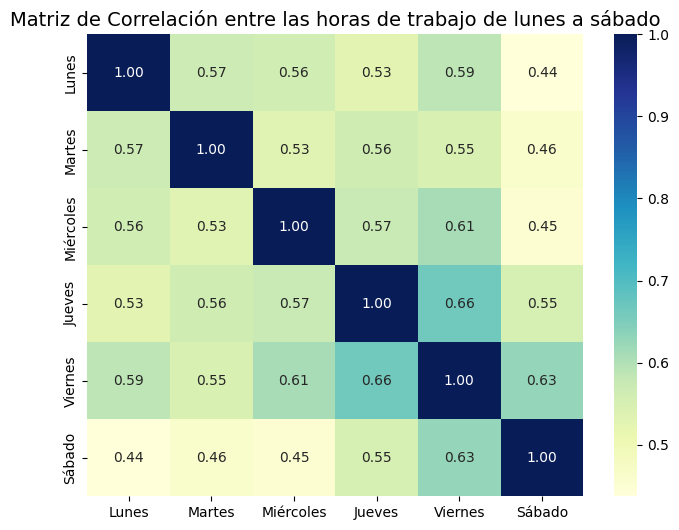

In [ ]:
# Seleccionamos las columnas P615_2 hasta P615_7
columns_p615 = ['Ocupación principal lunes', 'Ocupación principal martes', 'Ocupación principal miércoles', 'Ocupación principal jueves', 'Ocupación principal viernes', 'Ocupación principal sábado']

# Calcular la matriz de correlación para estas columnas
correlation_matrix_p615 = df_convertida[columns_p615].corr()


# Definir los nuevos labels para los días de la semana
days_labels = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado']

# Graficar la matriz de correlación con los labels actualizados
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_p615, annot=True, cmap='YlGnBu', fmt=".2f", xticklabels=days_labels, yticklabels=days_labels)
plt.title('Matriz de Correlación entre las horas de trabajo de lunes a sábado', fontsize=14)
plt.show()




* Regularidad de la semana laboral: Existe una tendencia clara a que las personas tengan un patrón de trabajo regular de lunes a viernes, con correlaciones entre estos días que sugieren una rutina estable en términos de horas trabajadas.
* Diferencias en los fines de semana: El sábado muestra una mayor variabilidad en comparación con los días laborales, lo que sugiere que no todos los trabajadores siguen el mismo patrón durante el fin de semana. Podría ser que algunos trabajen menos horas o incluso no trabajen en absoluto.
* Posibilidad de ajustes en la carga de trabajo: La relación entre días consecutivos sugiere que las personas pueden ajustar su carga de trabajo entre días cercanos, posiblemente en función de la demanda laboral o la flexibilidad de sus empleos.

En resumen, los patrones de trabajo durante la semana son más predecibles, mientras que el sábado ofrece mayor flexibilidad o variabilidad en términos de las horas trabajadas.

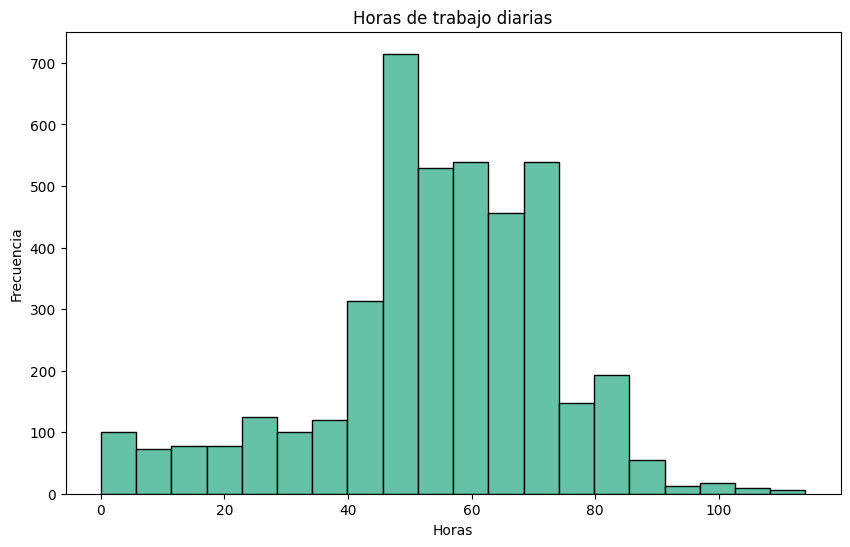

In [ ]:
# Vamos a crear un histograma para la variable P615_T

plt.figure(figsize=(10, 6))
plt.hist(df_convertida['Total horas trabajadas semana'].dropna(), bins=20, color='#66C2A5', edgecolor='black')
plt.title('Horas de trabajo diarias')
plt.xlabel('Horas')
plt.ylabel('Frecuencia')
plt.show()


* Predominio de una jornada laboral estándar: La mayor parte de la población sigue un patrón de trabajo que oscila entre 40 y 60 horas, lo cual es consistente con la normativa laboral en muchos países.
* Existencia de jornadas extensas: Hay un grupo notable de personas que trabaja más de 60 horas, lo que podría implicar trabajos informales, horas extras regulares o personas con más de un empleo.
* Diversidad en las horas trabajadas: Aunque hay una fuerte concentración en torno a las 40-60 horas, la dispersión hacia ambos extremos sugiere una población con diversas realidades laborales, incluyendo tanto trabajos de jornada reducida como jornadas extensas.

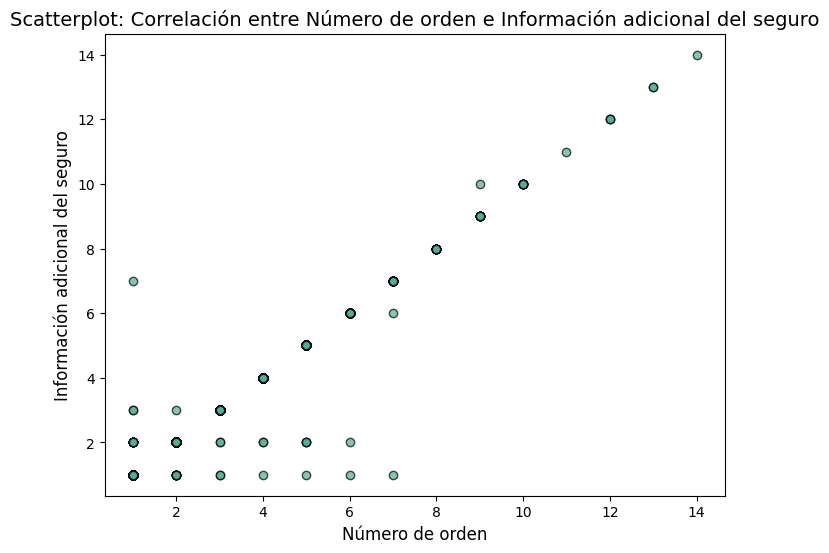

In [ ]:
# Crear scatterplot entre P200_N e INF_400 desde la base renombrada df_convertida con colores neutros.
plt.figure(figsize=(8, 6))
plt.scatter(df_convertida['Número de orden de residente'], df_convertida['Información adicional seguro'], c='#5A9', edgecolor='k', alpha=0.7)
plt.title('Scatterplot: Correlación entre Número de orden e Información adicional del seguro', fontsize=14)
plt.xlabel('Número de orden', fontsize=12)
plt.ylabel('Información adicional del seguro', fontsize=12)

plt.show()

#se explica pensando en como se convierten las variables categoricas a numeros, (van en orden)

* Correlación estructurada: Existe una correlación positiva clara entre el número de orden e información del seguro, lo que podría indicar que las personas en posiciones más altas en un sistema (quizás el orden familiar o jerárquico) tienden a tener más información sobre los seguros.
* Diferencias en los niveles inferiores: Los miembros con un número de orden bajo muestran más dispersión en cuanto a la información disponible del seguro, lo que podría apuntar a diferencias en roles o acceso a la información.
* Posible jerarquización en la obtención de información: Conforme aumenta el número de orden, parece haber una tendencia más uniforme a adquirir más información relacionada con el seguro, lo que puede sugerir un proceso más estructurado en cuanto a la obtención de este tipo de información.

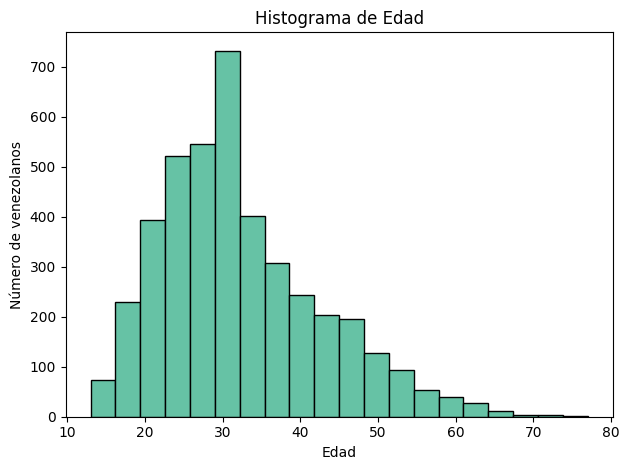

In [ ]:
plt.hist(df_convertida["Edad"].dropna(), bins=20, color='#66C2A5', edgecolor='black')
plt.title(f'Histograma de Edad')
plt.xlabel("Edad")
plt.ylabel('Número de venezolanos')

# Mostrar los histogramas
plt.tight_layout()
plt.show()


* Predominio de jóvenes adultos: La mayor parte de la población migrante venezolana en este estudio está compuesta por personas jóvenes adultas, lo que sugiere que la migración está impulsada principalmente por personas en búsqueda de oportunidades laborales o de estabilidad económica.
* Baja representación de personas mayores: La escasa representación de personas mayores de 60 años indica que la migración en esta población probablemente está siendo impulsada por personas en edad de trabajar, con pocas personas jubiladas o retiradas migrando.
* Posible influencia de factores económicos: Dado que la mayoría de los migrantes son jóvenes adultos, esto puede estar relacionado con factores como la búsqueda de empleo, educación o mejores condiciones de vida en el país receptor.

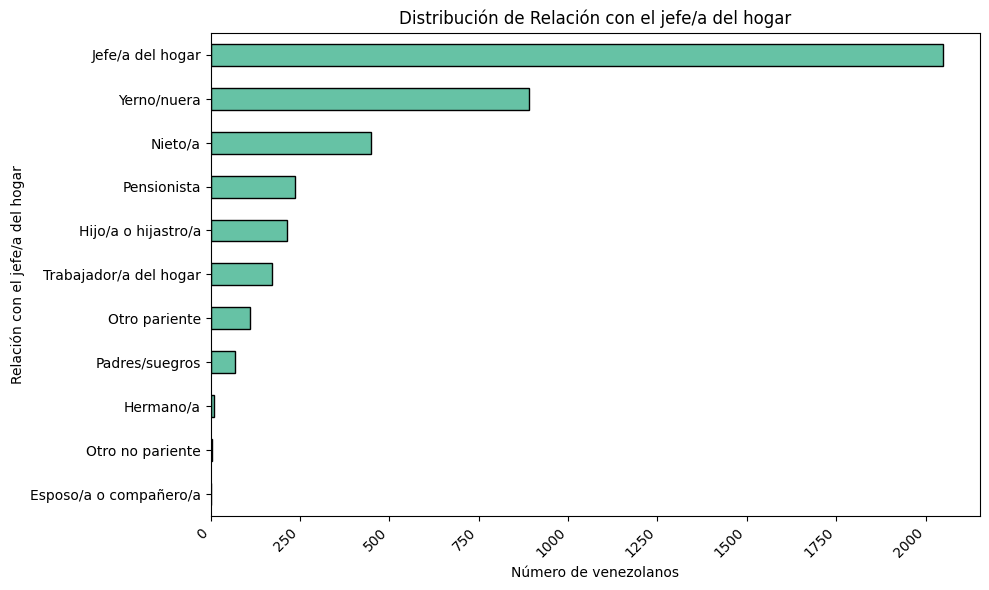

In [ ]:
# Actualizar el mapeo para que los valores vayan del 0 al 10
p203_labels_corrected = {
    0: 'Jefe/a del hogar',
    1: 'Esposo/a o compañero/a',
    2: 'Hijo/a o hijastro/a',
    3: 'Yerno/nuera',
    4: 'Nieto/a',
    5: 'Padres/suegros',
    6: 'Hermano/a',
    7: 'Otro pariente',
    8: 'Trabajador/a del hogar',
    9: 'Pensionista',
    10: 'Otro no pariente'
}


# Ahora vamos a graficar la distribución de P203 con las etiquetas corregidas
plt.figure(figsize=(10, 6))
df_convertida['Parentesco con jefe de hogar'].map(p203_labels_corrected).value_counts().sort_values(ascending=True).plot(kind='barh', color='#66C2A5', edgecolor='black')
plt.title('Distribución de Relación con el jefe/a del hogar')
plt.ylabel('Relación con el jefe/a del hogar')
plt.xlabel('Número de venezolanos')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


* Dominio de jefaturas de hogar: La gran mayoría de los migrantes venezolanos parecen estar ocupando el rol de jefe/a del hogar, lo que podría implicar que estas personas están asumiendo responsabilidades económicas y sociales dentro de sus hogares, lo que es un indicador de independencia o autosuficiencia.

* Importancia de las relaciones familiares: La presencia significativa de categorías como yerno/nuera y nieto/a sugiere que la migración venezolana está marcada por la reunificación familiar, donde los miembros de diferentes generaciones migran y se establecen juntos.

* Diversidad de roles dentro del hogar: Aunque la mayoría de las personas son jefes de hogar o familiares cercanos, también se observa una participación importante de trabajadores del hogar y pensionistas, lo que añade complejidad a la estructura social y económica de los hogares venezolanos en el país receptor.

In [ ]:
#Personas por ciudad
df_original['CIUDAD'].dropna().sort_values(ascending=True).value_counts()

,count
CIUDAD,
Lima,2354
Trujillo,468
Chimbote,309
Arequipa,257
Ica,216
Piura,209
Tumbes,198
Chiclayo,192


Text(0, 0.5, 'Número de venezolanos')

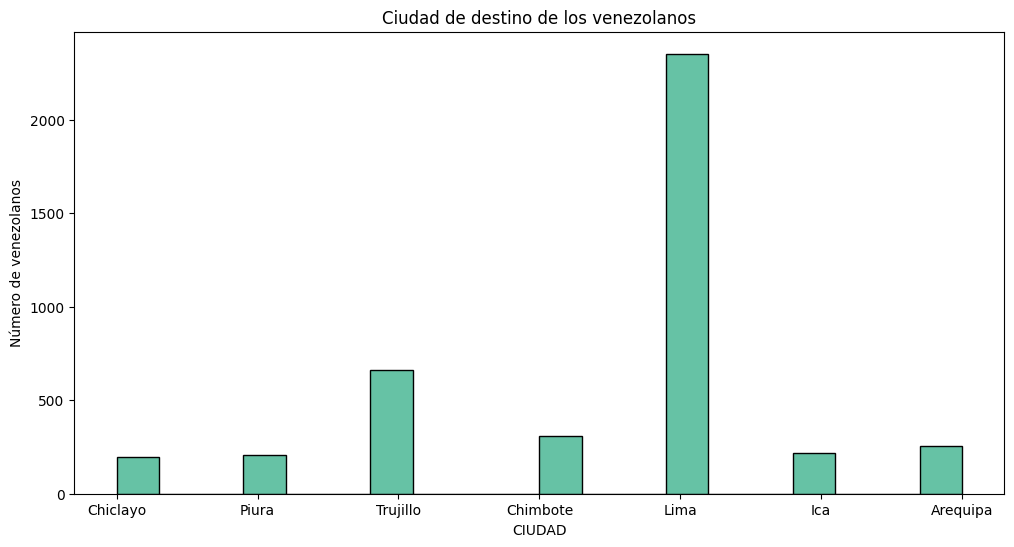

In [ ]:
# Creamos histogramas solo para las variables CIUDAD y P611_COD
CIUDAD_LABELS = {
    0: 'Arequipa',
    1: 'Trujillo',
    2: 'Chimbote',
    3: 'Ica',
    4: 'Lima',
    5: 'Piura',
    6: 'Trujillo',
    7: 'Chiclayo',

}
plt.figure(figsize=(12, 6))

# Histograma para CIUDAD
plt.hist(df_convertida['Ciudad de estudio'].map(CIUDAD_LABELS), bins=20, color='#66C2A5', edgecolor='black')
plt.title('Ciudad de destino de los venezolanos')
plt.xlabel('CIUDAD')
plt.ylabel('Número de venezolanos')


* Predominio de Lima: Lima es el principal destino de los venezolanos en Perú, probablemente debido a las mejores oportunidades económicas, laborales y de servicios que ofrece la capital en comparación con otras ciudades del país. Esta tendencia puede reflejar el patrón general de migración a grandes áreas metropolitanas por las oportunidades que brindan.

* Distribución menor en otras ciudades: Trujillo, Chimbote y Arequipa, aunque menos representadas que Lima, son destinos relevantes para la migración venezolana, posiblemente por sus oportunidades laborales regionales. Sin embargo, las demás ciudades tienen una menor cantidad de migrantes, lo que indica que estas áreas no son tan atractivas o accesibles para la mayoría de los migrantes.

* Oportunidades y desafíos: La concentración de migrantes en Lima puede representar tanto oportunidades (mayor disponibilidad de mano de obra y dinamismo económico) como desafíos (presión en los servicios públicos y el mercado laboral). Las ciudades secundarias podrían verse beneficiadas por una mayor distribución de la población migrante, aliviando la carga en Lima y promoviendo el desarrollo regional.

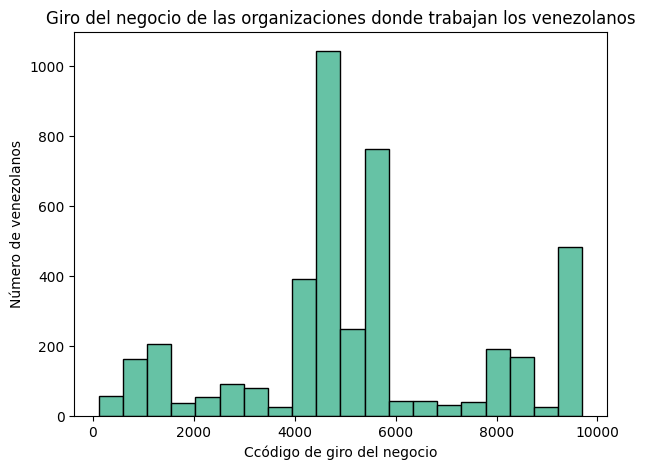

In [ ]:
# Histograma para P611_COD

plt.hist(df_convertida['Código de giro de la empresa'].dropna(), bins=20, color='#66C2A5', edgecolor='black')
plt.title('Giro del negocio de las organizaciones donde trabajan los venezolanos')
plt.xlabel('Código de giro del negocio')
plt.ylabel('Número de venezolanos')
plt.tight_layout()
plt.show()

* Focalización en sectores específicos: La mayor parte de la población venezolana trabaja en sectores clave, representados por los códigos 4000 y 6000. Estos sectores probablemente ofrecen más empleos accesibles para los migrantes, ya sea por la naturaleza del trabajo (tal vez en comercio, servicios o manufactura) o por la demanda laboral que tienen.

* Diversificación limitada: Aunque hay algunos venezolanos en otros sectores, la mayoría de los empleos parece concentrarse en unas pocas áreas. Esto podría implicar que, si bien hay oportunidades de empleo en ciertos sectores, la diversificación laboral para los migrantes es algo limitada y podría mejorar.

* Oportunidades de expansión: Sectores con menor representación podrían presentar oportunidades para políticas que fomenten la inclusión laboral de migrantes en áreas menos exploradas, o bien la formación específica para que los migrantes puedan acceder a esos empleos.